# Lab Exercise 3

### You need to print the notebook as PDF and submit it on moodle
#### The deadline of submission is 23:59, 14 March 2021

## Case Background

You are the teaching assistant of the subject BHMS3323. There are 20 students enrolled your class and you would like to use Python to record and analyse their learning performance.

The overall result of this subject is determined by four assessment components, they are the "homework 1", "homework 2", "test", and "exam". The weights of the components towards the final marks are:

|homework 1| homework 2| test| exam|
|:-:|:-:|:-:|:-:|
|20%| 20%| 20%| 40%|

The table below is the student list of the subject BHMS3323.

![namelist](images/lab_exercise03_namelist.png)

## Question 1

Create a Pandas `DataFrame` named `results` for storing the student's results. 
- Your dataframe should contains 4 columns named "HW1", "HW2", "Test", and "Exam". 
- You should use student name as the index of the DataFrame.
- You should initize a zero mark for all the assessment components.

In [6]:
# Question 1
# Write your code below:
import numpy as np
import pandas as pd

student_names = ["John Lee", "Peter Chan", "Janice Ma", "Roy Kwok", "Peter Ng", "Joe Lam", 
                 "Bill Kwan", "Christine Law", "Ricky Chan", "Thersa Mak", "Chole Wu", "Isaac Lee", 
                 "Gina Wut", "Candy Ip", "Ben Chan", "Anson Lo", "Jacky Shiu", "Catherine Wo", "Elton Tang", "Rock SHek"]

no_of_students = len(student_names)

data = {
    "HW1": np.zeros(no_of_students),
    "HW2": np.zeros(no_of_students),
    "Test": np.zeros(no_of_students),
    "Exam": np.zeros(no_of_students)
}

results = pd.DataFrame(data, index=student_names)
results

,HW1,HW2,Test,Exam
John Lee,0.0,0.0,0.0,0.0
Peter Chan,0.0,0.0,0.0,0.0
Janice Ma,0.0,0.0,0.0,0.0
Roy Kwok,0.0,0.0,0.0,0.0
Peter Ng,0.0,0.0,0.0,0.0
Joe Lam,0.0,0.0,0.0,0.0
Bill Kwan,0.0,0.0,0.0,0.0
Christine Law,0.0,0.0,0.0,0.0
Ricky Chan,0.0,0.0,0.0,0.0
Thersa Mak,0.0,0.0,0.0,0.0


## Question 2

The students got the following marks towards the semester ends. 

![namelist](images/lab_exercise03_marks.png)

- Write code to update the marks in `data` according to the above table.
- Add a column named 'total' in the DataFrame `results` with the overall marks for individual students, **the overall marks should be rounded to the nearest whole numbers.**
- Write code to find out which student got the highest mark in this course.
- Write code to find out which student got the lowst mark in this course.



In [65]:
# Question 2

results["HW1"] = np.array([81,71,99,52,42,76,71,31,69,39,68,34,43,95,81,34,100,65,71,31])
results["HW2"] = np.array([88,49,36,65,34,61,44,100,86,85,57,93,65,87,99,71,73,96,63,85])
results["Test"] = np.array([98,54,32,63,98,54,56,33,51,90,61,89,48,90,39,79,74,49,73,52])
results["Exam"] = np.array([38,54,100,86,92,64,88,72,82,55,74,93,64,81,41,36,98,56,79,37]) 

def cal_overall_marks(hw1,hw2,test,exam):
    return int(hw1*0.2 + hw2*0.2 + test*0.2 + exam*0.4)

results['total'] = results.apply(lambda row: cal_overall_marks(row['HW1'], row['HW2'], row['Test'], row['Exam']), axis=1 )

# Extract the row who has the highest mark and store it to tempory variables 
student_row = results.loc[results["total"] == results["total"].max()]
name = student_row.index[0]
marks = student_row['total'][0]
print("The student who got the highest mark is {name}, and his total marks is {marks}.".format(name=name, marks=marks))


# Extract the row who has the lowest mark and store it to tempory variables 
student_row = results.loc[results["total"] == results["total"].min()]
name = student_row.index[0]  
marks = student_row['total'][0]
print("The student who got the lowest mark is {name}, and his total marks is {marks}.".format(name=name, marks=marks))



The student who got the highest mark is Jacky Shiu, and his total marks is 88.
The student who got the lowest mark is Rock SHek, and his total marks is 48.


## Question 3

Suppose the following mark-to-grade conversion table is adopted in this course.

|Mark range| Grade|
|:-: | :-: |
|49 or below | F |
|50 to 59| D|
|60 to 69| C|
|70 to 79| B|
|80 or above| A|

- Add a column named 'grade' in the DataFrame `results` with the overall grade for individual students.




In [66]:
# Question 3

# Write your code below:

def get_grade(total_mark):
    grade = 'F'
    if total_mark in range(50, 60):
        grade = 'D'
    elif total_mark in range(60, 70):
        grade = 'C'
    elif total_mark in range(70, 80):
        grade = 'B'
    elif total_mark >= 80:
        grade = 'A'
        
    return grade

results['grade'] = results.apply(lambda row: get_grade(row['total']), axis=1)

In [67]:
results

,HW1,HW2,Test,Exam,total,grade
John Lee,81,88,98,38,68,C
Peter Chan,71,49,54,54,56,D
Janice Ma,99,36,32,100,73,B
Roy Kwok,52,65,63,86,70,B
Peter Ng,42,34,98,92,71,B
Joe Lam,76,61,54,64,63,C
Bill Kwan,71,44,56,88,69,C
Christine Law,31,100,33,72,61,C
Ricky Chan,69,86,51,82,74,B
Thersa Mak,39,85,90,55,64,C


## Question 4

Create a bar chart of the grade distibution of this subject. (i.e. you should show how many students got the different grades in your bar chart.)


<AxesSubplot:title={'center':'BHMS3323 Grade Distribution'}, xlabel='grade'>

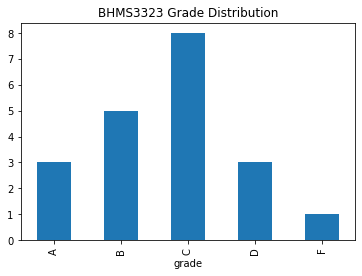

In [98]:
# Question 4

# Write your code below:

results.groupby('grade').grade.count().plot.bar(title ="BHMS3323 Grade Distribution")
